In [15]:
import pandas as pd 
from fastcore.helpers import load_pickle
from glob import glob 
import matplotlib.pyplot as plt 
plt.style.use(['science', 'nature'])
import dabest

In [6]:
results = glob('results/20221117-photoswitch_representation_effects/*.pkl')

In [7]:
len(results)

54

In [10]:
compiled_res = []

for res in results:
    loaded_file = load_pickle(res)
    compiled_res.append({
        'representation': loaded_file['representation'],
        'train_set_size': loaded_file['train_set_size'],
        'acc': loaded_file['cm'].ACC_Macro,
        'f1_macro': loaded_file['cm'].F1_Macro,
        'f1_micro': loaded_file['cm'].F1_Micro,
        'representation': loaded_file['representation'],
        'padding_length': loaded_file['padding_length'] if 'pad' in loaded_file['representation'] else None,
    })

In [11]:
compiled_res = pd.DataFrame(compiled_res)

In [13]:
compiled_res.groupby('representation').agg(['mean', 'std'])

train_set_size            acc            f1_macro            \
                            mean  std      mean       std      mean       std   
representation                                                                  
fragments                   10.0  0.0  0.758246  0.018955  0.207771  0.048000   
fragments-one-hot           10.0  0.0  0.732632  0.028952  0.144645  0.064458   
pad-3                       10.0  0.0  0.720238  0.036555  0.000000  0.000000   
pad-4pad-5                  10.0  0.0  0.723214  0.016533  0.000000  0.000000   
selfies                     10.0  0.0  0.732821  0.027239  0.012249  0.040626   
selfies-one-hot             10.0  0.0  0.697090  0.030993  0.000000  0.000000   

                   f1_micro           padding_length       
                       mean       std           mean  std  
representation                                             
fragments          0.395614  0.047387            NaN  NaN  
fragments-one-hot  0.331579  0.072380            NaN  NaN  
pad-3              0.000000  0.000000            3.0  0.0  
pad-4pad-5         0.000000  0.000000            5.0  0.0  
selfies            0.026316  0.087280            NaN  NaN  
selfies-one-hot    0.000000  0.000000            NaN  NaN

In [20]:
acc_selfies = compiled_res[compiled_res['representation'] == 'selfies']['acc']

acc_fragments = compiled_res[compiled_res['representation'] == 'fragments']['acc']

acc_fragments_one_hot = compiled_res[compiled_res['representation'] == 'fragments-one-hot']['acc']

acc_pad3 = compiled_res[compiled_res['representation'] == 'pad-3']['acc']

acc_pad5 = compiled_res[compiled_res['representation'] == 'pad-4pad-5']['acc']

acc_selfies_one_hot = compiled_res[compiled_res['representation'] == 'selfies-one-hot']['acc']

In [21]:
dabest_frame = pd.DataFrame(
    {
        'selfies': acc_selfies,
        'fragments': acc_fragments,
        'fragments-one-hot': acc_fragments_one_hot,
        'selfies-one-hot': acc_selfies_one_hot,
        'pad-3': acc_pad3,
        'pad-4': acc_pad5,
        'selfies-one-hot': acc_selfies_one_hot,
    }
)

In [22]:
dabest_frame

,selfies,fragments,fragments-one-hot,selfies-one-hot,pad-3,pad-4
0,0.714286,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.666667,NaN
2,NaN,NaN,0.737895,NaN,NaN,NaN
3,NaN,0.801053,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.714286,NaN,NaN
5,NaN,NaN,NaN,NaN,0.750000,NaN
6,0.714286,NaN,NaN,NaN,NaN,NaN
7,NaN,0.748421,NaN,NaN,NaN,NaN
8,0.750000,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.714286,NaN,NaN


In [23]:
dabest_e = dabest.load(dabest_frame, idx=("selfies", "fragments", "fragments-one-hot", "selfies-one-hot", "pad-3", "pad-4"), paired=False)

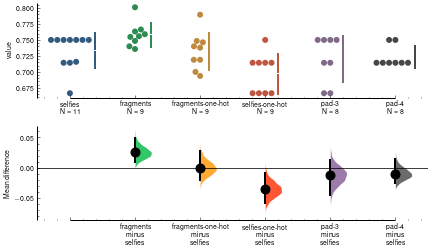

In [28]:
fig, ax = plt.subplots(1,1, figsize=(7, 4))
dabest_e.mean_diff.plot(ax=ax)
fig.savefig('representation_effects.pdf', bbox_inches='tight')